## Process Summary:
   In this Python script, I conducted an analysis of Crude Death Rate and Age-Standardized Death Rate from Chronic Obstructive Pulmonary Disease (COPD) in the United States and Uganda for the year 2019. The process involved several steps:


1.	**Calculation of Crude Death Rate:** I calculated the crude death rate for each country by summing up the age-specific death rates.


2.	**Age-Standardized Death Rate Calculation:** Utilizing a direct age standardization method, I calculated the Age-standardized Death Rates for both countries. This method involved multiplying the age-specific death rates by the corresponding proportions of the World Health Organization's (WHO) World Standard Population Distribution for each age group. The resulting values represent the expected number of deaths per 100,000 people if the age distribution of each country matched that of the world standard population.


3.	**Data Visualization:** I visualized the age-standardized death rates using Matplotlib, creating line plots to compare the rates between the United States and Uganda across different age groups.

4.	**Further Analysis:** To provide additional insights, I generated a bar plot to compare the age-standardized death rates between the two countries, allowing for a clearer comparison of the rates across age groups.

## Assumptions:
  - The provided age-specific death rates were accurate representations of the actual death rates in the respective countries for the year 2019.
  - The WHO World Standard Population Distribution was an appropriate standard for calculating age-standardized death rates.

**Reasons for Differences in Death Rates:** The differences in death rates between the United States and Uganda can be attributed to various factors, including differences in healthcare infrastructure, access to medical services, lifestyle factors, environmental conditions, and population demographics. These variations highlight the importance of considering age-standardized rates to make meaningful comparisons between populations with different age distributions.
'''


In [1]:
# Age-specific death rates for COPD in the United States and Uganda for 2019 (deaths per 100,000 people)
death_rates_usa = {
    "0-4": 0.04, "5-9": 0.02, "10-14": 0.02, "15-19": 0.02, "20-24": 0.06, "25-29": 0.11,
    "30-34": 0.29, "35-39": 0.56, "40-44": 1.42, "45-49": 4.00, "50-54": 14.13, "55-59": 37.22,
    "60-64": 66.48, "65-69": 108.66, "70-74": 213.10, "75-79": 333.06, "80-84": 491.10, "85+": 894.45
}


death_rates_uganda = {
    "0-4": 0.40, "5-9": 0.17, "10-14": 0.07, "15-19": 0.23, "20-24": 0.38, "25-29": 0.40,
    "30-34": 0.75, "35-39": 1.11, "40-44": 2.04, "45-49": 5.51, "50-54": 13.26, "55-59": 33.25,
    "60-64": 69.62, "65-69": 120.78, "70-74": 229.88, "75-79": 341.06, "80-84": 529.31, "85+": 710.40
}

#WHO World Standard Standard Population Distribution (percent)
standard_population_distributn = {
    "0-4": 8.86, "5-9": 8.69, "10-14": 8.60, "15-19": 8.47, "20-24": 8.22, "25-29": 7.93,
    "30-34": 7.61, "35-39": 7.15, "40-44": 6.59, "45-49": 6.04, "50-54": 5.37, "55-59": 4.55,
    "60-64": 3.72, "65-69": 2.96, "70-74": 2.21, "75-79": 1.52, "80-84":0.91, "85+": 0.63
}




In [2]:
def Crude_Death_Rate(death_rates_usa,death_rates_uganda):
   # Calculate the crude death rate for each country
   crude_death_rate_usa = sum(death_rates_usa.values())
   crude_death_rate_uganda = sum(death_rates_uganda.values())

# Print the crude death rates for each country
   print("Crude Death Rate (per 100,000 people) - United States: {:.1f}".format(crude_death_rate_usa))
   print("Crude Death Rate (per 100,000 people) - Uganda: {:.1f}".format(crude_death_rate_uganda))


# Call the function to calculate and print crude death rates
Crude_Death_Rate(death_rates_usa,death_rates_uganda)

# Calculate the age-standardized death rate using the world standard population
def age_standardize_death_rate(death_rates_usa,death_rates_uganda,standard_population_distributn):
    # Calculate the age-standardized death rate for each country
    Age_standardized_death_usa = list(death_rates_usa[age_group] * standard_population_distributn[age_group] for age_group in death_rates_usa)
    Age_standardized_death_uganda = list(death_rates_uganda[age_group] * standard_population_distributn[age_group] for age_group in death_rates_uganda)
    
   
    # Calculate the sum of age-standardized death rates for each country
    Age_standardized_death_usa_sm=sum(Age_standardized_death_usa)
    Age_standardized_death_uganda_sm=sum(Age_standardized_death_uganda)

    # Create a list of age groups
    age_group=list(age_group for age_group in standard_population_distributn)
     # Print the age-standardized death rates for each country
    print("Age-Standardized Death Rate (per 100,000 people) - United States: {:.1f}".format(Age_standardized_death_usa_sm))
    print("Age-Standardized Death Rate (per 100,000 people) - Uganda: {:.1f}".format(Age_standardized_death_uganda_sm))

    # Return the calculated values
    return Age_standardized_death_uganda,Age_standardized_death_usa,age_group



Crude Death Rate (per 100,000 people) - United States: 2164.7
Crude Death Rate (per 100,000 people) - Uganda: 2058.6


In [3]:
import pandas as pd
def creat_data_frame():
    # Calculate age-standardized death rates for both countries
    Age_standardized_death_uganda,Age_standardized_death_usa,age_group= age_standardize_death_rate(death_rates_usa,death_rates_uganda,standard_population_distributn)

# Create DataFrames for each country
    age_group_df=pd.DataFrame(age_group,columns=['age_group'])
    column_name1=['Age_standardized_death_usa']
    Age_standardized_death_usa_df=pd.DataFrame(Age_standardized_death_usa,columns=column_name1)
    column_name=['Age_standardized_death_uganda']
    Age_standardized_death_uganda_df=pd.DataFrame(Age_standardized_death_uganda,columns=column_name)
    
 #merge data frames 
    merged_df= pd.merge(Age_standardized_death_uganda_df,Age_standardized_death_usa_df,left_index=True,right_index=True)
    merged_df=pd.merge(age_group_df,merged_df,left_index=True,right_index=True)
    return merged_df
# Call the function and display the DataFrame
df=creat_data_frame()
df
    

Age-Standardized Death Rate (per 100,000 people) - United States: 2843.7
Age-Standardized Death Rate (per 100,000 people) - Uganda: 2868.9


,age_group,Age_standardized_death_uganda,Age_standardized_death_usa
0,0-4,3.5440,0.3544
1,5-9,1.4773,0.1738
2,10-14,0.6020,0.1720
3,15-19,1.9481,0.1694
4,20-24,3.1236,0.4932
5,25-29,3.1720,0.8723
6,30-34,5.7075,2.2069
7,35-39,7.9365,4.0040
8,40-44,13.4436,9.3578
9,45-49,33.2804,24.1600


Text(0.5, 1.0, 'age-standardized death rate for all ages in both the United States and Uganda for 2019.')

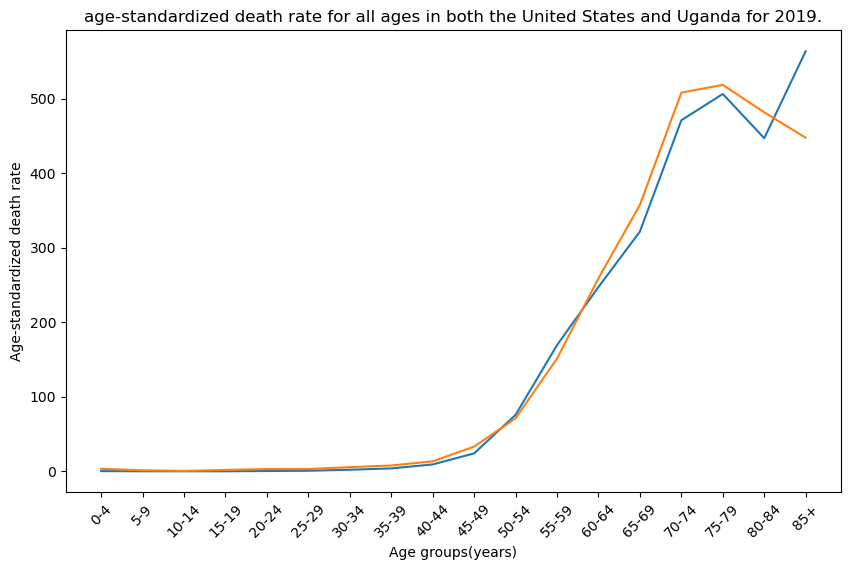

In [4]:

import matplotlib.pyplot as plt
# Create a figure with a specific size
plt.figure(figsize=(10,6))

# Plot the age-standardized death rates for the United States and Uganda
plt.plot(df['age_group'],df['Age_standardized_death_usa'],label='USA')
plt.plot(df['age_group'],df['Age_standardized_death_uganda'],label='Uganda')

# Setting x-axis ticks and labels
plt.xticks(rotation=45)  # Rotate the tick labels for better visibility
plt.xticks(range(len(df['age_group'])), df['age_group'])  # Set ticks at each data point

# Setting x-axis ticks and labels
plt.xlabel('Age groups(years)')
plt.ylabel('Age-standardized death rate')
plt.title('age-standardized death rate for all ages in both the United States and Uganda for 2019.')

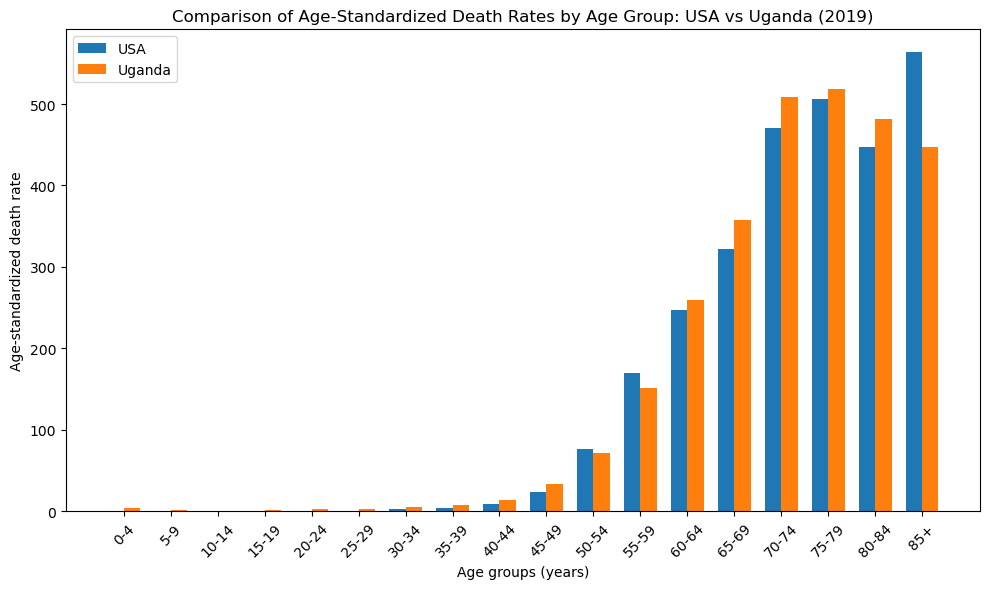

In [5]:
import numpy as np


# Define the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
x_usa = np.arange(len(df['age_group']))
x_uganda = [x + bar_width for x in x_usa]

# Plotting the bars
plt.figure(figsize=(10,6))
plt.bar(x_usa, df['Age_standardized_death_usa'], width=bar_width, label='USA')
plt.bar(x_uganda, df['Age_standardized_death_uganda'], width=bar_width, label='Uganda')

# Setting x-axis ticks and labels
plt.xticks(rotation=45, ticks=np.arange(len(df['age_group'])) + bar_width / 2, labels=df['age_group'])

# Adding labels, title, and legend
plt.xlabel('Age groups (years)')
plt.ylabel('Age-standardized death rate')
plt.title('Comparison of Age-Standardized Death Rates by Age Group: USA vs Uganda (2019)')
plt.legend()

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
